In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [3]:
#step 1:

# Load the Iris dataset
iris=load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Preview the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
#step 2:

# Clean and Preprocess: Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Create scaled DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=iris.feature_names)

# Save species column for later evaluation (not used in clustering)
species = iris.target

# No target/label column in df_scaled — clustering is unsupervised!
print("Scaled dataset ready:")
display(df_scaled.head())

Scaled dataset ready:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [6]:
### 2A: KMeans Clustering:

## Description

# KMeans partitions the data into K clusters by:

#-- Randomly initializing K centroids.

#-- Assigning each point to its closest centroid.

#-- Recomputing centroids based on the assigned points.

#-- Iterating until convergence.

## Why KMeans for Iris?
#The Iris dataset has 3 natural clusters (species), making it a great candidate for KMeans, which works well when clusters are compact and spherical.

In [12]:
# A) Apply KMeans Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['kmeans_cluster'] = kmeans.fit_predict(df_scaled)
df_scaled

C:\Users\SREECHAND MUKUNDAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_cluster,hierarchical_cluster
0,-0.900681,1.019004,-1.340227,-1.315444,2,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1,1
2,-1.385353,0.328414,-1.397064,-1.315444,1,1
3,-1.506521,0.098217,-1.283389,-1.315444,1,1
4,-1.021849,1.249201,-1.340227,-1.315444,2,1
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,0,3
146,0.553333,-1.282963,0.705921,0.922303,0,3
147,0.795669,-0.131979,0.819596,1.053935,0,3
148,0.432165,0.788808,0.933271,1.448832,0,3


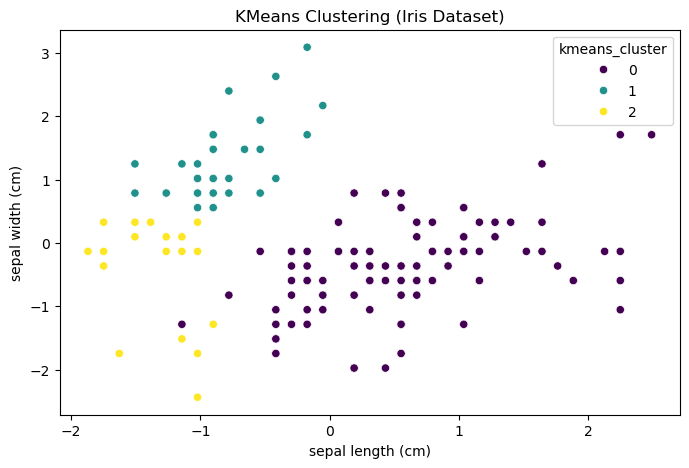

In [8]:
# Visualize KMeans clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_scaled, x=iris.feature_names[0], y=iris.feature_names[1],
                hue='kmeans_cluster', palette='viridis')
plt.title('KMeans Clustering (Iris Dataset)')
plt.show()

In [9]:
# 2B. Hierarchical Clustering:

# How It Works
#-- Hierarchical clustering forms a tree-like structure (dendrogram) by:

#-- Treating each point as its own cluster (agglomerative).

#-- Merging the closest pair iteratively using a linkage criterion.

#-- Cutting the dendrogram at a specific height to form final clusters.

# Why Suitable for Iris

# It visually explains cluster relationships and doesn’t require the number of clusters upfront.

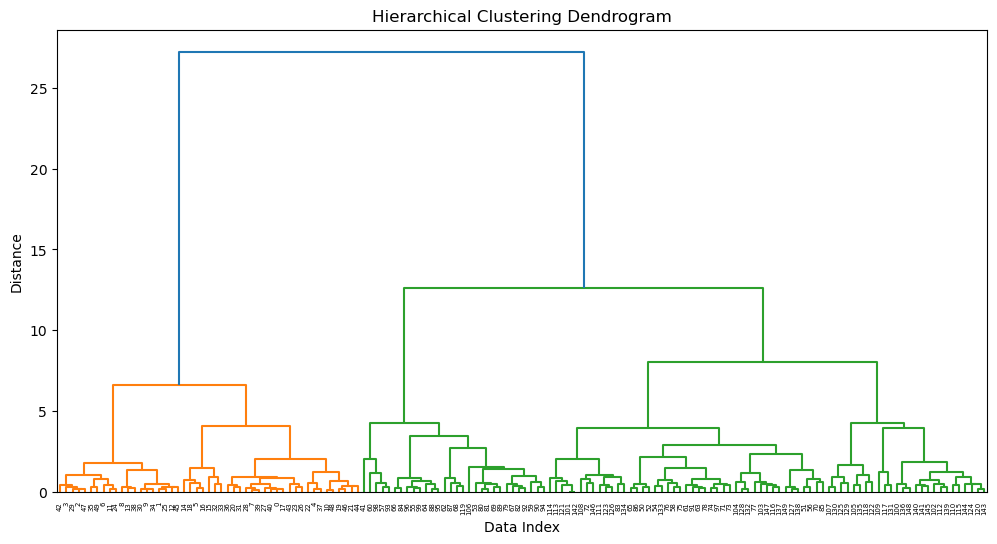

In [10]:
# B)Apply Hierarchical Clustering

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(df_scaled.iloc[:, :-1], method='ward')
# Dendrogram to visualize hierarchical structure
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Index")
plt.ylabel("Distance")
plt.show()

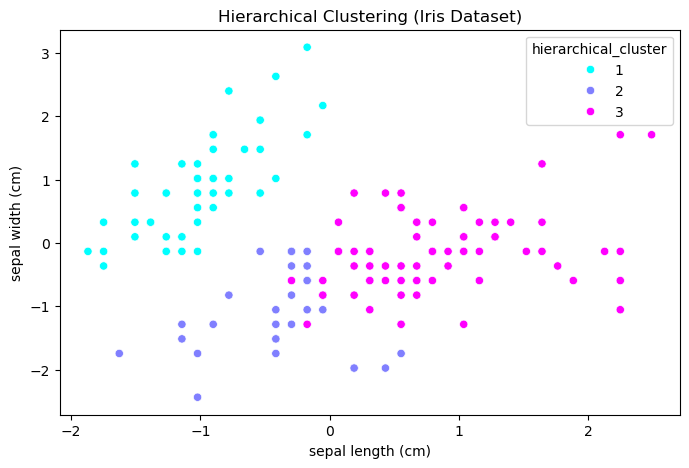

In [11]:
# Cut tree to form 3 clusters
df_scaled['hierarchical_cluster'] = fcluster(Z, t=3, criterion='maxclust')
# Visualize Hierarchical clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_scaled, x=iris.feature_names[0], y=iris.feature_names[1],
                hue='hierarchical_cluster', palette='cool')
plt.title("Hierarchical Clustering (Iris Dataset)")
plt.show()